## Title: Explore new business opportunities in various cities of Wake County, NC state

### Introduction & Business problem

A businessman wants to start a new business in North Carolina, USA. With RDU International Airport in the middle and multiple Fortune-100 Tech companies around, Wake county is his first choice for setting up the business in NC. So he wants to explore the various business opportunities in Wake county. For him to decide in which city he shall make investment to start the business, he wants to explore the following data: 

1)	What are the various cities in Wake county in NC state?  
2)	What are the various businesses in these cities?  
3)	What is the count of each these businesses in each of these cities?  
4)	What are the 10 most & least common businesses in these cities? 

Apart from exploring the above mentioned data, he also wants to focus particularly on Restaurants & other food businesses because of his earlier experience in restaurant business.  

Fortunately for the businessman, also for all other potential investors/businesses, we can provide this information using Data Science methodologies & Python language.


### Solution approach and Data points

Here are the data points that we need for this project:  

1)	Identify the cities in Wake county, NC: This data may be available on the Internet.  
2)	Address info (i.e. longitude & latitude) for these cities.  
3)	Identify & explore various businesses, venues in these cities.  
4)	Identify the no. of businesses, their frequency, top-10 most/least common businesses in these cities and calculate their frequency.  
5)	Identify the business densities in these cities using above data points.  


#### Data Sources:
Here are the sources for this data:  

1) List of cities in Wake county is available on Internet at the following website:

https://www.sog.unc.edu/resources/microsites/knapp-library/cities-north-carolina

2)	We can get the longitude & latitude of the top-10 cities using geopy.geocoders.  
3)	Using the longitude & latitude values from above step, we can explore various businesses, venues in these cities using Foursquare API.  
4)	We can identify the no. of businesses, frequency, most common, least common businesses using data from above step.  
5)	We can visualize the business densities in these cities using Folium visualization library.
6)  We can use Kmeans clustering unsupervised algorithm to divide cities into cluster areas to find out areas with maximum businesses. Using this information, we can identify the least common type of restaurants available in cities with high number of businesses. These restaurants will be the best solutions for starting new ventures.

## Download and Explore data sets

#### First download all the required libraries/packages

In [2]:
import requests # library to handle requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
import json
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

#### Find coordinates for Wake county, NC

In [3]:
address = 'Wake County, NC'

geolocator = Nominatim(user_agent="NC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Wake County, NC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Wake County, NC are 35.7979355, -78.6118311.


#### Load, explore and clean up the first data set

In [4]:
url = 'https://www.sog.unc.edu/resources/microsites/knapp-library/cities-north-carolina'
html = requests.get(url).content
df_list = pd.read_html(html)
wake_cities1 = df_list[0]
wake_cities1

,0,1,2
0,City/Town,Additional Information,County
1,Aberdeen,Chamber of CommerceConvention and Visitors Bur...,Moore
2,Ahoskie,Chamber of CommerceEconomic Development,Hertford
3,Alamance,Chamber of Commerce,Alamance
4,Albemarle,Chamber of CommerceVisitors Guide,Stanly
5,Alliance,Chamber of Commerce,Pamlico
6,Andrews,Chamber of Commerce,Cherokee
7,Angier,Chamber of Commerce,Harnett/Wake
8,Ansonville,Chamber of Commerce,Anson
9,Apex,Chamber of CommerceEconomic Development,Wake


In [5]:
wake_cities = wake_cities1

In [9]:
wake_cities.rename(columns={0: "City", 1: "Info", 2: "County"}, inplace = True)
wake_cities.drop(['Info'], axis=1, inplace=True)
wake_cities.drop(wake_cities[wake_cities.County != 'Wake'].index, inplace = True)
wake_cities.reset_index(drop=True, inplace = True)
wake_cities

,City,County
0,Apex,Wake
1,Fuquay-Varina,Wake
2,Garner,Wake
3,Holly Springs,Wake
4,Knightdale,Wake
5,Raleigh,Wake
6,Rolesville,Wake
7,Wake Forest,Wake
8,Wendell,Wake
9,Zebulon,Wake


In [10]:
wake_cities.City

0             Apex
1    Fuquay-Varina
2           Garner
3    Holly Springs
4       Knightdale
5          Raleigh
6       Rolesville
7      Wake Forest
8          Wendell
9          Zebulon
Name: City, dtype: object

In [11]:
# Identify the coordinates (Latitude, Longitude for each of these cities) 
latitude = [] 
longitude = [] 
i=1
for x in wake_cities.City : 
    address = wake_cities.City[i-1] + ", NC"
    geolocator = Nominatim(user_agent="nc_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    i=i+1
    
wake_cities["latitude"] = latitude
wake_cities["longitude"] = longitude
print(wake_cities)

The geograpical coordinate of Apex, NC are [35.7325352], [-78.8505516].
The geograpical coordinate of Fuquay-Varina, NC are [35.7325352, 35.5843849], [-78.8505516, -78.7998691].
The geograpical coordinate of Garner, NC are [35.7325352, 35.5843849, 35.7112642], [-78.8505516, -78.7998691, -78.6141709].
The geograpical coordinate of Holly Springs, NC are [35.7325352, 35.5843849, 35.7112642, 35.6512655], [-78.8505516, -78.7998691, -78.6141709, -78.8336218].
The geograpical coordinate of Knightdale, NC are [35.7325352, 35.5843849, 35.7112642, 35.6512655, 35.7878975], [-78.8505516, -78.7998691, -78.6141709, -78.8336218, -78.4822938].
The geograpical coordinate of Raleigh, NC are [35.7325352, 35.5843849, 35.7112642, 35.6512655, 35.7878975, 35.7803977], [-78.8505516, -78.7998691, -78.6141709, -78.8336218, -78.4822938, -78.6390989].
The geograpical coordinate of Rolesville, NC are [35.7325352, 35.5843849, 35.7112642, 35.6512655, 35.7878975, 35.7803977, 35.9232862], [-78.8505516, -78.7998691, -7

In [12]:
wake_data = wake_cities
wake_data

,City,County,latitude,longitude
0,Apex,Wake,35.732535,-78.850552
1,Fuquay-Varina,Wake,35.584385,-78.799869
2,Garner,Wake,35.711264,-78.614171
3,Holly Springs,Wake,35.651266,-78.833622
4,Knightdale,Wake,35.787897,-78.482294
5,Raleigh,Wake,35.780398,-78.639099
6,Rolesville,Wake,35.923286,-78.457391
7,Wake Forest,Wake,35.980314,-78.510373
8,Wendell,Wake,35.780987,-78.369721
9,Zebulon,Wake,35.824321,-78.314720


In [90]:
# define Wake county's geolocation coordinates
# 35.7979355, -78.6118311
wake_latitude = 35.7979355 
wake_longitude = -78.6118311

# define the world map centered around Canada with a higher zoom level
wake_map = folium.Map(location=[wake_latitude, wake_longitude], zoom_start=10)

# display world map
wake_map


In [79]:
wake_data

,City,County,latitude,longitude
0,Apex,Wake,35.732535,-78.850552
1,Fuquay-Varina,Wake,35.584385,-78.799869
2,Garner,Wake,35.711264,-78.614171
3,Holly Springs,Wake,35.651266,-78.833622
4,Knightdale,Wake,35.787897,-78.482294
5,Raleigh,Wake,35.780398,-78.639099
6,Rolesville,Wake,35.923286,-78.457391
7,Wake Forest,Wake,35.980314,-78.510373
8,Wendell,Wake,35.780987,-78.369721
9,Zebulon,Wake,35.824321,-78.314720


In [110]:
lat=wake_data['latitude']
lng=wake_data['longitude']

print(lat, lng)

0    35.732535
1    35.584385
2    35.711264
3    35.651266
4    35.787897
5    35.780398
6    35.923286
7    35.980314
8    35.780987
9    35.824321
Name: latitude, dtype: float64 0   -78.850552
1   -78.799869
2   -78.614171
3   -78.833622
4   -78.482294
5   -78.639099
6   -78.457391
7   -78.510373
8   -78.369721
9   -78.314720
Name: longitude, dtype: float64


In [118]:
# create map of Wake County using latitude and longitude values
for lat1, lng1 in zip(wake_data['latitude'], wake_data['longitude']):
    map_Wake = folium.Map(location=[lat1, lng1], zoom_start=10)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat1, lng1],
        radius=5,
        Popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Wake) 

map_Wake

In [14]:
# Enter Foursquare ID details to get required data from Foursquare app.
CLIENT_ID = 'MSNMMGSCRZIA0SASHUDGUISUSIUL2NM2UZNLLOD5VUGC3KA2' 
CLIENT_SECRET = 'PBKYG2N2JJQAMSAW0DBNWUDTGGENQTI2NJ5OOX4B04EEXMFB'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MSNMMGSCRZIA0SASHUDGUISUSIUL2NM2UZNLLOD5VUGC3KA2
CLIENT_SECRET:PBKYG2N2JJQAMSAW0DBNWUDTGGENQTI2NJ5OOX4B04EEXMFB


In [15]:
# Define getNearbyVenues function to extract Food/restaurant Venue information from Foursquare

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=5000
        section='food'
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# Extract Wake county food/restaurant venue information by City
wake_venues = getNearbyVenues(names=wake_data['City'],
                                   latitudes=wake_data['latitude'],
                                   longitudes=wake_data['longitude']
                                  )

Apex
Fuquay-Varina
Garner
Holly Springs
Knightdale
Raleigh
Rolesville
Wake Forest
Wendell
Zebulon


In [18]:
print(wake_venues.shape)
wake_venues.head()

(181, 7)


,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Apex,35.732535,-78.850552,Scratch Kitchen and Taproom,35.732493,-78.851346,Southern / Soul Food Restaurant
1,Apex,35.732535,-78.850552,Anna's Pizzeria,35.730837,-78.851463,Pizza Place
2,Apex,35.732535,-78.850552,The Provincial,35.731342,-78.851171,American Restaurant
3,Apex,35.732535,-78.850552,La Rancherita,35.730902,-78.851383,Mexican Restaurant
4,Apex,35.732535,-78.850552,Buttercream's Bakeshop,35.731264,-78.851461,Bakery


In [19]:
# Identify the no. of food venues by City
food_group=wake_venues.groupby('city').count()
food_group=food_group.drop(['city Latitude','city Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)
food_group=food_group.rename(columns = {"Venue":"Food Venue"})
food_group

,Food Venue
city,
Apex,13
Fuquay-Varina,6
Garner,10
Holly Springs,12
Knightdale,3
Raleigh,100
Rolesville,7
Wake Forest,12
Wendell,8


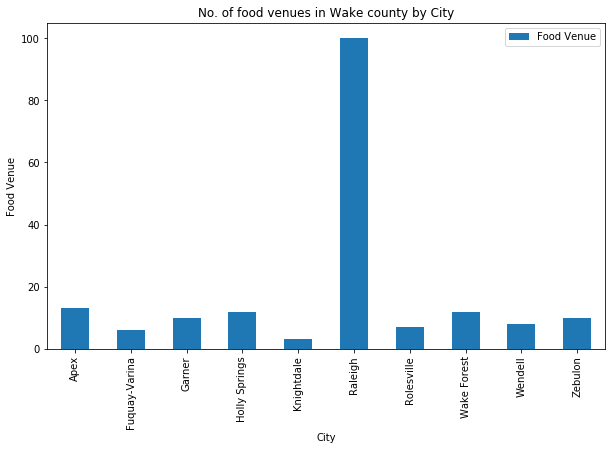

In [21]:
import matplotlib.pyplot as plt
#for name, hex in matplotlib.colors.cnames.items():     print(name, hex)

# step 2: plot data
food_group.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Food Venue') # add y-label to the plot
plt.title('No. of food venues in Wake county by City') # add title to the plot

plt.show()

In [22]:
print('There are {} uniques categories.'.format(len(wake_venues['Venue Category'].unique())))

There are 41 uniques categories.


In [23]:
wake_onehot = pd.get_dummies(wake_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
wake_onehot['city'] = wake_venues['city'] 

# move city column to the first column
fixed_columns = [wake_onehot.columns[-1]] + list(wake_onehot.columns[:-1])
wake_onehot = wake_onehot[fixed_columns]

wake_onehot.head()

,city,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Breakfast Spot,Burger Joint,Café,...,Restaurant,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Apex,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Apex,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Apex,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apex,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apex,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
wake_onehot.shape

(181, 42)

In [25]:
wake_grouped = wake_onehot.groupby('city').mean().reset_index()
wake_grouped

,city,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Breakfast Spot,Burger Joint,Café,...,Restaurant,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Apex,0.153846,0.000000,0.00,0.000,0.076923,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076923,0.00,0.00,0.00,0.000000,0.00,0.076923
1,Fuquay-Varina,0.166667,0.000000,0.00,0.000,0.166667,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
2,Garner,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.100000,0.00,0.00,0.00,0.000000,0.00,0.000000
3,Holly Springs,0.000000,0.083333,0.00,0.000,0.000000,0.00,0.00,0.000000,0.000000,...,0.083333,0.000000,0.083333,0.000000,0.00,0.00,0.00,0.083333,0.00,0.083333
4,Knightdale,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.00,0.00,0.00,0.000000,0.00,0.000000
5,Raleigh,0.100000,0.030000,0.02,0.000,0.020000,0.01,0.01,0.030000,0.060000,...,0.010000,0.070000,0.030000,0.020000,0.02,0.06,0.02,0.010000,0.01,0.000000
6,Rolesville,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.285714,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
7,Wake Forest,0.083333,0.000000,0.00,0.000,0.000000,0.00,0.00,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
8,Wendell,0.000000,0.000000,0.00,0.125,0.125000,0.00,0.00,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
9,Zebulon,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.100000,...,0.000000,0.100000,0.000000,0.100000,0.10,0.00,0.00,0.000000,0.00,0.000000


In [26]:
# Identify the top-10 food venues by city
num_top_venues = 10

for hood in wake_grouped['city']:
    print("----"+hood+"----")
    temp = wake_grouped[wake_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apex----
                             venue  freq
0                      Pizza Place  0.23
1              American Restaurant  0.15
2                       Food Truck  0.15
3               Mexican Restaurant  0.15
4  Southern / Soul Food Restaurant  0.08
5               Italian Restaurant  0.08
6                      Wings Joint  0.08
7                           Bakery  0.08
8                     Burger Joint  0.00
9                   Sandwich Place  0.00


----Fuquay-Varina----
                      venue  freq
0        Mexican Restaurant  0.33
1               Pizza Place  0.33
2       American Restaurant  0.17
3                    Bakery  0.17
4                Restaurant  0.00
5                 Irish Pub  0.00
6        Italian Restaurant  0.00
7       Japanese Restaurant  0.00
8         Korean Restaurant  0.00
9  Mediterranean Restaurant  0.00


----Garner----
                             venue  freq
0                      Pizza Place   0.3
1               Mexican Restaurant   0.

In [27]:
# Define a function to identify the least common food venues in each of the wake county cities.
def return_least_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
# Identify the least common food venues in each of the wake county cities.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
citys_venues_sorted = pd.DataFrame(columns=columns)
citys_venues_sorted['city'] = wake_grouped['city']

for ind in np.arange(wake_grouped.shape[0]):
    citys_venues_sorted.iloc[ind, 1:] = return_least_common_venues(wake_grouped.iloc[ind, :], num_top_venues)

citys_venues_sorted.head()

,city,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,Apex,Greek Restaurant,Restaurant,Ramen Restaurant,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Japanese Restaurant,Sushi Restaurant,Irish Pub,Indian Restaurant
1,Fuquay-Varina,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant
2,Garner,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant
3,Holly Springs,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,French Restaurant,Korean Restaurant,Ramen Restaurant
4,Knightdale,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Pizza Place


In [29]:
# set number of clusters
# As the city dataset contains 10 cities, no. of clusters can be set to 4.
kclusters = 4

wake_grouped_clustering = wake_grouped.drop('city', 1)

# run k-means clustering using 200 iterations
kmeans = KMeans(n_clusters=kclusters, n_init=200, random_state=0).fit(wake_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50]

array([0, 1, 2, 2, 3, 0, 2, 0, 1, 2], dtype=int32)

In [30]:
#Prepare the necessary data sets for clustering.

wake_merged = wake_data
wake_merged = wake_merged.join(citys_venues_sorted.set_index('city'), on='City')
# Keep only the cities that have at least 1 restaurant i.e 50 out of 81
wake_merged = wake_merged[pd.notnull(wake_merged['1st Least Common Venue'])]
# add clustering labels
wake_merged['Cluster Labels'] = kmeans.labels_

In [58]:
wake_merged

,City,County,latitude,longitude,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
0,Apex,Wake,35.732535,-78.850552,Greek Restaurant,Restaurant,Ramen Restaurant,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Japanese Restaurant,Sushi Restaurant,Irish Pub,Indian Restaurant,0
1,Fuquay-Varina,Wake,35.584385,-78.799869,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,1
2,Garner,Wake,35.711264,-78.614171,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,2
3,Holly Springs,Wake,35.651266,-78.833622,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,French Restaurant,Korean Restaurant,Ramen Restaurant,2
4,Knightdale,Wake,35.787897,-78.482294,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,3
5,Raleigh,Wake,35.780398,-78.639099,Wings Joint,Bagel Shop,Japanese Restaurant,Food,Fast Food Restaurant,Thai Restaurant,Restaurant,Ramen Restaurant,Korean Restaurant,Irish Pub,0
6,Rolesville,Wake,35.923286,-78.457391,American Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Ramen Restaurant,Restaurant,2
7,Wake Forest,Wake,35.980314,-78.510373,Greek Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Irish Pub,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Restaurant,Sandwich Place,0
8,Wendell,Wake,35.780987,-78.369721,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Sandwich Place,1
9,Zebulon,Wake,35.824321,-78.314720,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,2


In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wake_merged['latitude'], wake_merged['longitude'], wake_merged['City'], wake_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [97]:
wake_merged.loc[wake_merged['Cluster Labels'] < 5, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]

,City,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
0,Apex,Greek Restaurant,Restaurant,Ramen Restaurant,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Japanese Restaurant,Sushi Restaurant,Irish Pub,Indian Restaurant,0
1,Fuquay-Varina,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,1
2,Garner,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,2
3,Holly Springs,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,French Restaurant,Korean Restaurant,Ramen Restaurant,2
4,Knightdale,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,3
5,Raleigh,Wings Joint,Bagel Shop,Japanese Restaurant,Food,Fast Food Restaurant,Thai Restaurant,Restaurant,Ramen Restaurant,Korean Restaurant,Irish Pub,0
6,Rolesville,American Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Ramen Restaurant,Restaurant,2
7,Wake Forest,Greek Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Irish Pub,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Restaurant,Sandwich Place,0
8,Wendell,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Sandwich Place,1
9,Zebulon,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,2


In [32]:
wake_merged.loc[wake_merged['Cluster Labels'] == 0, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]

,City,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
0,Apex,Greek Restaurant,Restaurant,Ramen Restaurant,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Japanese Restaurant,Sushi Restaurant,Irish Pub,Indian Restaurant,0
5,Raleigh,Wings Joint,Bagel Shop,Japanese Restaurant,Food,Fast Food Restaurant,Thai Restaurant,Restaurant,Ramen Restaurant,Korean Restaurant,Irish Pub,0
7,Wake Forest,Greek Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Irish Pub,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Restaurant,Sandwich Place,0


In [33]:
wake_merged.loc[wake_merged['Cluster Labels'] == 1, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]

,City,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
1,Fuquay-Varina,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,1
8,Wendell,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Sandwich Place,1


In [34]:
wake_merged.loc[wake_merged['Cluster Labels'] == 2, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]

,City,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
2,Garner,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,2
3,Holly Springs,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,French Restaurant,Korean Restaurant,Ramen Restaurant,2
6,Rolesville,American Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Ramen Restaurant,Restaurant,2
9,Zebulon,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,2


In [35]:
wake_merged.loc[wake_merged['Cluster Labels'] == 3, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]

,City,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
4,Knightdale,American Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,3


In [36]:
#Based on the above clusters, 3rd cluster seem to be most dense. Let us capture these records into a Dataframe.

food_clustered=wake_merged.loc[wake_merged['Cluster Labels'] == 2, wake_merged.columns[[0] + list(range(4, wake_merged.shape[1]))]]
food_clustered=food_clustered.set_index('City', drop=True)
food_clustered


,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,Cluster Labels
City,,,,,,,,,,,
Garner,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Ramen Restaurant,2
Holly Springs,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,French Restaurant,Korean Restaurant,Ramen Restaurant,2
Rolesville,American Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Ramen Restaurant,Restaurant,2
Zebulon,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,2


In [38]:
# Define getNearbyVenues function to extract information about shops from Foursquare

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    shops_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=5000
        section='shops'
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        shops_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_shops = pd.DataFrame([item for shop_list in shops_list for item in shop_list])
    nearby_shops.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_shops)

In [39]:
# Extract Wake county shop information by City

wake_shops = getNearbyVenues(names=wake_data['City'],
                                   latitudes=wake_data['latitude'],
                                   longitudes=wake_data['longitude']
                                  )

Apex
Fuquay-Varina
Garner
Holly Springs
Knightdale
Raleigh
Rolesville
Wake Forest
Wendell
Zebulon


In [40]:
print(wake_shops.shape)
wake_shops.head()

(443, 7)


,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Apex,35.732535,-78.850552,Apex Outfitters,35.732560,-78.850462,Accessories Store
1,Apex,35.732535,-78.850552,Empire Cigars The Vault,35.732026,-78.851139,Smoke Shop
2,Apex,35.732535,-78.850552,The Beer Dispensary,35.731237,-78.851193,Beer Store
3,Apex,35.732535,-78.850552,All Booked Up,35.730946,-78.851244,Bookstore
4,Apex,35.732535,-78.850552,"William Dickinson, LMBT",35.738274,-78.849424,Massage Studio


In [41]:
# Identify the no. of shops by City

shop_group=wake_shops.groupby('city').count()
shop_group=shop_group.drop(['city Latitude','city Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)
shop_group=shop_group.rename(columns = {"Venue":"Shop Venue"})
shop_group #This creates a dataframe showing number of shopping venues in each city

,Shop Venue
city,
Apex,70
Fuquay-Varina,53
Garner,35
Holly Springs,44
Knightdale,16
Raleigh,100
Rolesville,22
Wake Forest,51
Wendell,20


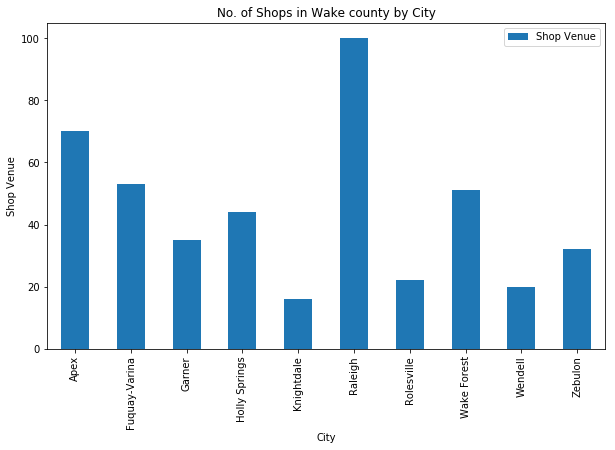

In [42]:
shop_group.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Shop Venue') # add y-label to the plot
plt.title('No. of Shops in Wake county by City') # add title to the plot

plt.show()

In [43]:
shops_onehot = pd.get_dummies(wake_shops[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
shops_onehot['city'] = wake_shops['city'] 

# move city column to the first column
fixed_columns = [shops_onehot.columns[-1]] + list(shops_onehot.columns[:-1])
shops_onehot = shops_onehot[fixed_columns]

shops_onehot.head()

,city,ATM,Accessories Store,Antique Shop,Arts & Crafts Store,Auto Garage,Auto Workshop,Beer Store,Bookstore,Boutique,...,Smoke Shop,Smoothie Shop,Sporting Goods Shop,Street Food Gathering,Supermarket,Thrift / Vintage Store,Toy / Game Store,Video Store,Watch Shop,Wine Shop
0,Apex,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Apex,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Apex,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apex,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Apex,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
shops_grouped = shops_onehot.groupby('city').mean().reset_index()
shops_grouped.head()

,city,ATM,Accessories Store,Antique Shop,Arts & Crafts Store,Auto Garage,Auto Workshop,Beer Store,Bookstore,Boutique,...,Smoke Shop,Smoothie Shop,Sporting Goods Shop,Street Food Gathering,Supermarket,Thrift / Vintage Store,Toy / Game Store,Video Store,Watch Shop,Wine Shop
0,Apex,0.014286,0.014286,0.0,0.028571,0.000000,0.000000,0.014286,0.042857,0.100000,...,0.028571,0.000000,0.014286,0.0,0.014286,0.028571,0.0,0.014286,0.0,0.0
1,Fuquay-Varina,0.000000,0.000000,0.0,0.000000,0.056604,0.018868,0.000000,0.000000,0.037736,...,0.000000,0.000000,0.000000,0.0,0.000000,0.037736,0.0,0.000000,0.0,0.0
2,Garner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.0,0.028571,0.000000,0.0,0.000000,0.0,0.0
3,Holly Springs,0.022727,0.000000,0.0,0.022727,0.022727,0.000000,0.022727,0.000000,0.000000,...,0.000000,0.022727,0.022727,0.0,0.022727,0.000000,0.0,0.022727,0.0,0.0
4,Knightdale,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [45]:
# Identify the top-10 shops by city

num_top_venues = 10

for hood in shops_grouped['city']:
    print("----"+hood+"----")
    temp = shops_grouped[shops_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apex----
                    venue  freq
0                Boutique  0.10
1               Gift Shop  0.10
2        Business Service  0.10
3        Insurance Office  0.06
4  Furniture / Home Store  0.06
5                  Lawyer  0.04
6               Bookstore  0.04
7            Home Service  0.04
8          Massage Studio  0.04
9       Convenience Store  0.04


----Fuquay-Varina----
                        venue  freq
0                Home Service  0.13
1              Cosmetics Shop  0.11
2  Construction & Landscaping  0.08
3            Business Service  0.06
4                   Gift Shop  0.06
5      Furniture / Home Store  0.06
6            Insurance Office  0.06
7                 Men's Store  0.06
8                 Auto Garage  0.06
9      Thrift / Vintage Store  0.04


----Garner----
                        venue  freq
0            Business Service  0.26
1            Insurance Office  0.14
2                Home Service  0.14
3  Construction & Landscaping  0.06
4           Mobile

In [46]:
# Define a function to identify the most common venues in each of the wake county cities.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
# Identify the most common venues in each of the wake county cities.

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_shops_sorted = pd.DataFrame(columns=columns)
cities_shops_sorted['city'] = shops_grouped['city']

for ind in np.arange(shops_grouped.shape[0]):
    cities_shops_sorted.iloc[ind, 1:] = return_most_common_venues(shops_grouped.iloc[ind, :], num_top_venues)

cities_shops_sorted.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apex,Business Service,Gift Shop,Boutique,Insurance Office,Furniture / Home Store,Lawyer,Jewelry Store,Home Service,Convenience Store,Bookstore
1,Fuquay-Varina,Home Service,Cosmetics Shop,Construction & Landscaping,Insurance Office,Auto Garage,Business Service,Furniture / Home Store,Gift Shop,Men's Store,Thrift / Vintage Store
2,Garner,Business Service,Insurance Office,Home Service,Mobile Phone Shop,Construction & Landscaping,Supermarket,Discount Store,Gift Shop,Beer Store,Flower Shop
3,Holly Springs,Home Service,Construction & Landscaping,Business Service,Insurance Office,Pharmacy,Farmers Market,Locksmith,Lawyer,IT Services,Grocery Store
4,Knightdale,Business Service,Construction & Landscaping,Insurance Office,Shipping Store,Cosmetics Shop,Event Service,Flower Shop,Home Service,IT Services,Locksmith


In [48]:
# set number of clusters
# As the city dataset contains 10 cities, no. of clusters can be set to 4.
kclusters = 4

shops_grouped_clustering = shops_grouped.drop('city', 1)

# run k-means clustering with 200 iterations
kmeans = KMeans(n_clusters=kclusters, n_init=200, random_state=0).fit(shops_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 3, 3, 1, 2, 1, 0, 2], dtype=int32)

In [49]:
#Prepare the necessary data sets for clustering.

shops_merged = wake_data
shops_merged = shops_merged.join(cities_shops_sorted.set_index('city'), on='City')
shops_merged = shops_merged[pd.notnull(shops_merged['1st Most Common Venue'])]
# add clustering labels
shops_merged['Cluster Labels'] = kmeans.labels_

In [92]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(shops_merged['latitude'], shops_merged['longitude'], shops_merged['City'], shops_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


In [93]:
map_clusters

In [96]:
shops_merged.loc[shops_merged['Cluster Labels'] < 5, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Apex,Business Service,Gift Shop,Boutique,Insurance Office,Furniture / Home Store,Lawyer,Jewelry Store,Home Service,Convenience Store,Bookstore,1
1,Fuquay-Varina,Home Service,Cosmetics Shop,Construction & Landscaping,Insurance Office,Auto Garage,Business Service,Furniture / Home Store,Gift Shop,Men's Store,Thrift / Vintage Store,1
2,Garner,Business Service,Insurance Office,Home Service,Mobile Phone Shop,Construction & Landscaping,Supermarket,Discount Store,Gift Shop,Beer Store,Flower Shop,0
3,Holly Springs,Home Service,Construction & Landscaping,Business Service,Insurance Office,Pharmacy,Farmers Market,Locksmith,Lawyer,IT Services,Grocery Store,3
4,Knightdale,Business Service,Construction & Landscaping,Insurance Office,Shipping Store,Cosmetics Shop,Event Service,Flower Shop,Home Service,IT Services,Locksmith,3
5,Raleigh,Lawyer,Business Service,Home Service,Furniture / Home Store,Gift Shop,Thrift / Vintage Store,Beer Store,Clothing Store,Shoe Store,Hobby Shop,1
6,Rolesville,Insurance Office,Construction & Landscaping,Furniture / Home Store,Home Service,Pharmacy,Shipping Store,Clothing Store,Discount Store,Gift Shop,Health & Beauty Service,2
7,Wake Forest,Gift Shop,Construction & Landscaping,Business Service,Boutique,Arts & Crafts Store,Lawyer,Home Service,Flower Shop,Wine Shop,Grocery Store,1
8,Wendell,Insurance Office,Clothing Store,Business Service,Home Service,Toy / Game Store,Gun Shop,Sporting Goods Shop,Convenience Store,Beer Store,Gift Shop,0
9,Zebulon,Insurance Office,Business Service,Construction & Landscaping,Furniture / Home Store,Pharmacy,Department Store,Home Service,Electronics Store,Floating Market,Gift Shop,2


In [51]:
shops_merged.loc[shops_merged['Cluster Labels'] == 0, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
2,Garner,Business Service,Insurance Office,Home Service,Mobile Phone Shop,Construction & Landscaping,Supermarket,Discount Store,Gift Shop,Beer Store,Flower Shop,0
8,Wendell,Insurance Office,Clothing Store,Business Service,Home Service,Toy / Game Store,Gun Shop,Sporting Goods Shop,Convenience Store,Beer Store,Gift Shop,0


In [52]:
shops_merged.loc[shops_merged['Cluster Labels'] == 1, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Apex,Business Service,Gift Shop,Boutique,Insurance Office,Furniture / Home Store,Lawyer,Jewelry Store,Home Service,Convenience Store,Bookstore,1
1,Fuquay-Varina,Home Service,Cosmetics Shop,Construction & Landscaping,Insurance Office,Auto Garage,Business Service,Furniture / Home Store,Gift Shop,Men's Store,Thrift / Vintage Store,1
5,Raleigh,Lawyer,Business Service,Home Service,Furniture / Home Store,Gift Shop,Thrift / Vintage Store,Beer Store,Clothing Store,Shoe Store,Hobby Shop,1
7,Wake Forest,Gift Shop,Construction & Landscaping,Business Service,Boutique,Arts & Crafts Store,Lawyer,Home Service,Flower Shop,Wine Shop,Grocery Store,1


In [53]:
shops_merged.loc[shops_merged['Cluster Labels'] == 2, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
6,Rolesville,Insurance Office,Construction & Landscaping,Furniture / Home Store,Home Service,Pharmacy,Shipping Store,Clothing Store,Discount Store,Gift Shop,Health & Beauty Service,2
9,Zebulon,Insurance Office,Business Service,Construction & Landscaping,Furniture / Home Store,Pharmacy,Department Store,Home Service,Electronics Store,Floating Market,Gift Shop,2


In [54]:
shops_merged.loc[shops_merged['Cluster Labels'] == 3, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
3,Holly Springs,Home Service,Construction & Landscaping,Business Service,Insurance Office,Pharmacy,Farmers Market,Locksmith,Lawyer,IT Services,Grocery Store,3
4,Knightdale,Business Service,Construction & Landscaping,Insurance Office,Shipping Store,Cosmetics Shop,Event Service,Flower Shop,Home Service,IT Services,Locksmith,3


In [55]:
#Based on the above clusters, 3rd cluster seem to be most dense. Let us capture these records into a Dataframe.

shops_clustered=shops_merged.loc[shops_merged['Cluster Labels'] == 2, shops_merged.columns[[0] + list(range(4, shops_merged.shape[1]))]]
shops_clustered

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
6,Rolesville,Insurance Office,Construction & Landscaping,Furniture / Home Store,Home Service,Pharmacy,Shipping Store,Clothing Store,Discount Store,Gift Shop,Health & Beauty Service,2
9,Zebulon,Insurance Office,Business Service,Construction & Landscaping,Furniture / Home Store,Pharmacy,Department Store,Home Service,Electronics Store,Floating Market,Gift Shop,2


Combine the data we have captured from the clusters and the no. of venues from each of the cities to identify the most & least common shops and food businesses in the cities from high dense clusters. Using this information, we can find out the least common businesses in the cities with high density of businesses. These businesses will be ideal choice for starting new ventures.

In [56]:
wake_high= pd.concat ([shops_clustered, food_clustered,shop_group,food_group],axis=1)
wake_high['Total Places'] = wake_high[['Shop Venue', 'Food Venue']].sum(axis=1)

In [57]:
wake_high1=wake_high[['1st Least Common Venue','2nd Least Common Venue', '3rd Least Common Venue','Total Places']].copy()
wake_high2=wake_high1[pd.notnull(wake_high1['1st Least Common Venue'])]
wake_high2=wake_high2.sort_values(['Total Places'], ascending=[False])
wake_high2

,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,Total Places
Holly Springs,American Restaurant,Gastropub,Vegetarian / Vegan Restaurant,56.0
Garner,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,45.0
Zebulon,American Restaurant,Vegetarian / Vegan Restaurant,Hot Dog Joint,42.0
Rolesville,American Restaurant,Indian Restaurant,Irish Pub,29.0


### From the above dataset, we can identify the least common businesses in the cities with high number of businesses.
### These will be our recommendations for the new businessman & for all other potetial investors.